In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data.shape

(42000, 785)

In [4]:
test_data  = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submission_df = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
test_data.shape, submission_df.shape

((28000, 784), (28000, 2))

In [5]:
data.isna().sum().sum()

0

In [6]:
x = np.array(data.drop('label', axis =1))
y = np.array(data['label'])

In [7]:
# creating seprate datasets for training and validation will be using original x and y for making the final predection
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1)
x_train.shape, y_val.shape

((37800, 784), (4200,))

Text(0.5, 1.0, '3')

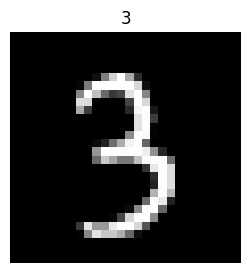

In [8]:
image = np.random.randint(len(x))
plt.figure(figsize= (3,3))
plt.imshow(x_train[image].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f'{y_train[image]}')

## Using ML models
Using non-linear models like Random Forest and XGBoost for the task of classification.

In [9]:
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
# rf_model = RandomForestClassifier(n_estimators = 100, random_state = len(x_train), max_depth = 12).fit(x_train, y_train)

# rf_train_pred = rf_model.predict(x_train)
# rf_val_pred = rf_model.predict(x_val)

# print(accuracy_score(y_train, rf_train_pred)*100)
# print(accuracy_score(y_val, rf_val_pred)*100)

In [11]:
# xgb_model = XGBClassifier(
#     n_estimators = 100, 
#     random_state = len(x_train),
#     use_label_encoder=False
# )

# xgb_model.fit(x_train, y_train)

# xgb_train_pred = xgb_model.predict(x_train)
# xgb_val_pred = xgb_model.predict(x_val)

# print(accuracy_score(y_train, xgb_train_pred)*100)
# print(accuracy_score(y_val, xgb_val_pred)*100)

In [12]:
def plot_confusion_matrix(y_actual, y_pred, title):
    plt.figure(figsize = (8,8))
    cm = confusion_matrix(y_actual, y_pred)
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
    
# plot_confusion_matrix(y_val, rf_val_pred, 'Random Forest Validation')
# plot_confusion_matrix(y_val, xgb_val_pred, 'XGBoost Validation')

We are getting pretty good accuracy for the XGB model so we are making our first prediction thorugh it

In [13]:
# %%time
# xgb_model.fit(x, y)

In [14]:
# submission_df.columns

In [15]:
def make_submission(model):
    pred = model.predict(test_data)
    submission_df['Label'] = pred
    submission_df.to_csv('submission.csv', index = False)

In [16]:
# make_submission(xgb_model)

By using the XGB Classifier model we got the score of `0.97403`

# Using ANN

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda, Input, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

2024-06-29 21:37:12.082056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 21:37:12.082192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 21:37:12.227999: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Currently we are only using the Dense layers to make the predections. Which will be a MLP problem

In [109]:
model = Sequential()

model.add(Input(shape = (28*28,)))
model.add(Lambda(lambda x: x/255))
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [110]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy'],
    optimizer = Adam(learning_rate = 0.01)
)

In [111]:
%%time
making_submission = True
if !making_submission :
    history = model.fit(
        x_train, y_train,
        epochs = 55, 
        batch_size = 50,
        validation_data = (x_val, y_val)
    )

Epoch 1/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8487 - loss: 0.4818 - val_accuracy: 0.9471 - val_loss: 0.1903
Epoch 2/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9331 - loss: 0.2321 - val_accuracy: 0.9517 - val_loss: 0.1826
Epoch 3/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9415 - loss: 0.1954 - val_accuracy: 0.9560 - val_loss: 0.1548
Epoch 4/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9469 - loss: 0.1822 - val_accuracy: 0.9560 - val_loss: 0.1708
Epoch 5/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9498 - loss: 0.1685 - val_accuracy: 0.9598 - val_loss: 0.1585
Epoch 6/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9523 - loss: 0.1645 - val_accuracy: 0.9605 - val_loss: 0.1530
Epoch 7/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9568 - loss: 0.1563 - val_accuracy: 0.9626 - val_loss: 0.1349
Epoch 8/85
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9608 - loss: 0.1409 - val_accuracy: 0.

Clear Signs of Overfitting\
Model -> 256R, 128R, 32R, 10S\
Model -> 128R, 64R, 10S 

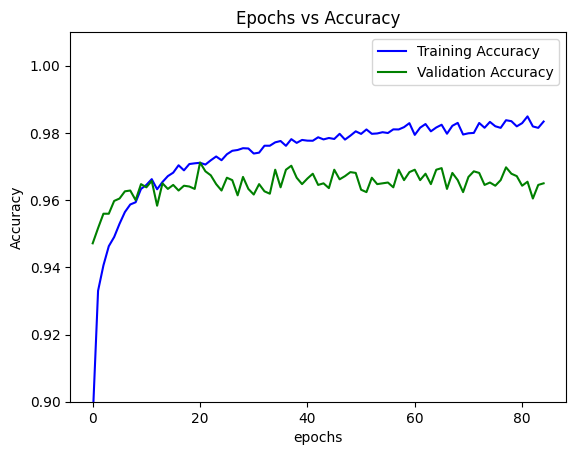

In [112]:
plt.plot(history.history['accuracy'], color='blue', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label = 'Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.ylim(0.9, 1.01)
plt.title("Epochs vs Accuracy")
plt.legend()

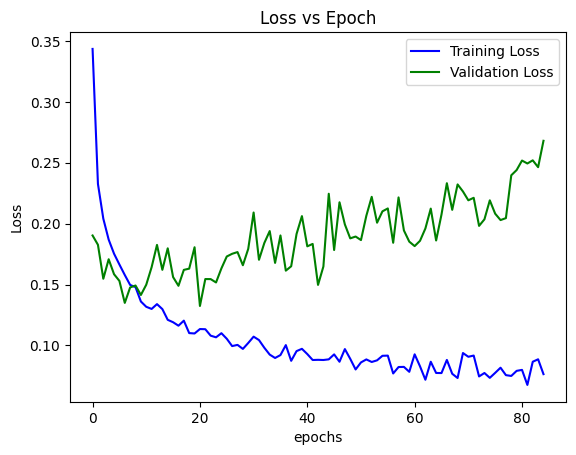

In [113]:
plt.plot(history.history['loss'], color='blue', label = 'Training Loss')
plt.plot(history.history['val_loss'], color='green', label = 'Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.title("Loss vs Epoch")
plt.legend()

In [118]:
model.evaluate(x_val, y_val)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.2792


[0.26798123121261597, 0.9649999737739563]

In [119]:
pred = model.predict(x_val)
pred = np.argmax(pred, axis = 1)
pred

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([8, 3, 5, ..., 3, 0, 8])

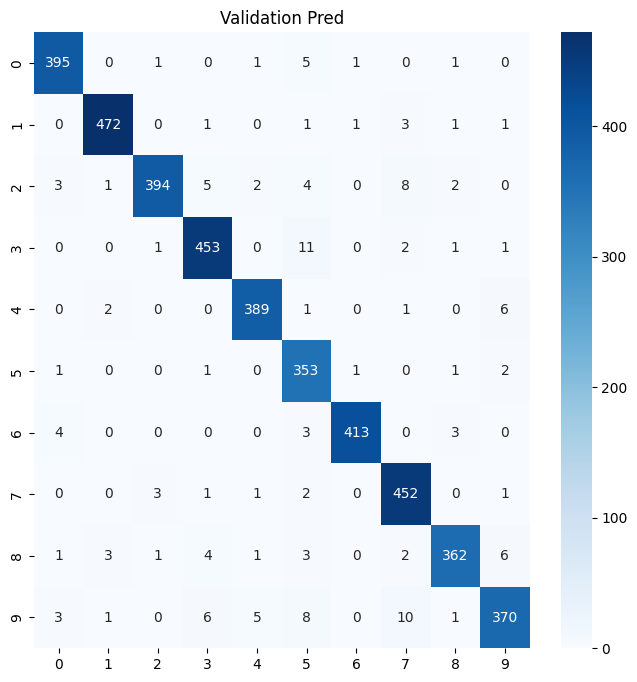

In [120]:
plot_confusion_matrix(y_val, pred, "Validation Pred")

In [121]:
wrng_idx = [idx for idx in range(len(pred)) if pred[idx]!=y_val[idx]]
len(wrng_idx)

147

The best acccuracy I can see for this model is about 50 epochs, so using it.

## Final Predection

Will be submitting the solution for this model for the ANN, Training on whole dataset.

In [127]:
if making_submission:
    history = model.fit(
        x, y,
        epochs = 50, 
        batch_size = 50
    )

Epoch 1/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9829 - loss: 0.0822
Epoch 2/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0695
Epoch 3/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9852 - loss: 0.0740
Epoch 4/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9862 - loss: 0.0633
Epoch 5/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9863 - loss: 0.0633
Epoch 6/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0603
Epoch 7/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9871 - loss: 0.0612
Epoch 8/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9849 - loss: 0.0825
Epoch 9/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0698
Epoch 10/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9839 - loss: 0.0784
Epoch 11/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9840 - loss: 0.0773
Epoch 12/50
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [132]:
def make_submission_ann(model):
    pred = model.predict(test_data)
    submission_df['Label'] = np.argmax(pred, axis = 1)
    submission_df.to_csv('submission.csv', index = False)

In [133]:
make_submission_ann(model)
submission_df

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,3
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
